# Análisis exploratório de datos de la estación de agua "Rincón del Bonete", Uruguay.

Los datos fueron descargados desde la pagina del Obsertvatório Ambiental Nacional - [Visor de datos en tiempo real](https://www.ambiente.gub.uy/datos-tiempo-real/).
2019-02-01 00:00 a 2025-02-18 23:59

## Carga de los paquetes Python necesarios

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

## Lectura de la planilla eletronica

In [31]:
xlsx = glob("./datos/Blanvira_Rincón del Bonete/*.xlsx")
xlsx
df = pd.concat(pd.read_excel(excel_file) for excel_file in xlsx)
df["Fecha del dato"] = pd.to_datetime(df["Fecha del dato"])
df.head()

,Fecha del dato,Fecha de insercion,Valor,Estado del medidor,Estado del emisor,Parametro
0,2023-04-01 00:00:00,2023-09-06 17:05:19,32.871,OK,ENCENDIDO,Turbidez
1,2023-04-01 00:30:00,2023-09-06 17:05:19,33.677,OK,ENCENDIDO,Turbidez
2,2023-04-01 01:00:00,2023-09-06 17:05:19,32.659,OK,ENCENDIDO,Turbidez
3,2023-04-01 01:30:00,2023-09-06 17:05:20,35.004,OK,ENCENDIDO,Turbidez
4,2023-04-01 02:00:00,2023-09-06 17:05:20,39.418,OK,ENCENDIDO,Turbidez


In [33]:
df.Parametro.unique()

array(['Turbidez', 'Temperatura', 'Oxigeno disuelto',
       'Potencial de hidrogeno (pH)', 'Saturación de oxígeno',
       'Ficocianina', 'Clorofila a', 'Conductividad'], dtype=object)

In [34]:
print("Fecha del primer registro de Turbidez", df[df['Parametro'] == 'Turbidez']["Fecha del dato"].min())
print("Fecha del último registro de Turbidez", df[df['Parametro'] == 'Turbidez']["Fecha del dato"].max())
print("\n")
print("Fecha del primer registro de Temperatura", df[df['Parametro'] == 'Temperatura']["Fecha del dato"].min())
print("Fecha del último registro de Temperatura", df[df['Parametro'] == 'Temperatura']["Fecha del dato"].max())
print("\n")
print("Fecha del primer registro de Oxigeno disuelto", df[df['Parametro'] == 'Oxigeno disuelto']["Fecha del dato"].min())
print("Fecha del último registro de Oxigeno disuelto", df[df['Parametro'] == 'Oxigeno disuelto']["Fecha del dato"].max())
print("\n")
print("Fecha del primer registro de pH", df[df['Parametro'] == 'Potencial de hidrogeno (pH)']["Fecha del dato"].min())
print("Fecha del último registro de pH", df[df['Parametro'] == 'Potencial de hidrogeno (pH)']["Fecha del dato"].max())
print("\n")
print("Fecha del primer registro de Saturación de oxígeno", df[df['Parametro'] == 'Saturación de oxígeno']["Fecha del dato"].min())
print("Fecha del último registro de Saturación de oxígeno", df[df['Parametro'] == 'Saturación de oxígeno']["Fecha del dato"].max())
print("\n")
print("Fecha del primer registro de Ficocianina", df[df['Parametro'] == 'Ficocianina']["Fecha del dato"].min())
print("Fecha del último registro de Ficocianina", df[df['Parametro'] == 'Ficocianina']["Fecha del dato"].max())
print("\n")
print("Fecha del primer registro de Chl_a", df[df['Parametro'] == 'Clorofila a']["Fecha del dato"].min())
print("Fecha del último registro de Chl_a", df[df['Parametro'] == 'Clorofila a']["Fecha del dato"].max())
print("\n")
print("Fecha del primer registro de Conductividad", df[df['Parametro'] == 'Conductividad']["Fecha del dato"].min())
print("Fecha del último registro de Conductividad", df[df['Parametro'] == 'Conductividad']["Fecha del dato"].max())

Fecha del primer registro de Turbidez 2023-04-01 00:00:00
Fecha del último registro de Turbidez 2025-02-17 23:30:00


Fecha del primer registro de Temperatura 2023-04-01 00:00:00
Fecha del último registro de Temperatura 2025-02-10 10:30:00


Fecha del primer registro de Oxigeno disuelto 2023-04-01 00:00:00
Fecha del último registro de Oxigeno disuelto 2025-02-17 23:30:00


Fecha del primer registro de pH 2023-04-01 00:00:00
Fecha del último registro de pH 2025-02-17 23:30:00


Fecha del primer registro de Saturación de oxígeno 2023-04-01 00:00:00
Fecha del último registro de Saturación de oxígeno 2025-02-17 23:30:00


Fecha del primer registro de Ficocianina 2023-04-01 00:00:00
Fecha del último registro de Ficocianina 2025-02-17 23:30:00


Fecha del primer registro de Chl_a 2023-04-01 00:00:00
Fecha del último registro de Chl_a 2025-02-17 23:30:00


Fecha del primer registro de Conductividad 2023-04-01 00:00:00
Fecha del último registro de Conductividad 2025-02-17 23:30:00


## Calculo del valor diário

In [45]:
daily_mean = df.groupby([df['Fecha del dato'].dt.date, df['Parametro']])['Valor'].mean().to_frame().reset_index()
daily_mean.head()

,Fecha del dato,Parametro,Valor
0,2023-04-01,Clorofila a,0.266250
1,2023-04-01,Conductividad,90.824625
2,2023-04-01,Ficocianina,8.478125
3,2023-04-01,Oxigeno disuelto,7.403750
4,2023-04-01,Potencial de hidrogeno (pH),7.596250


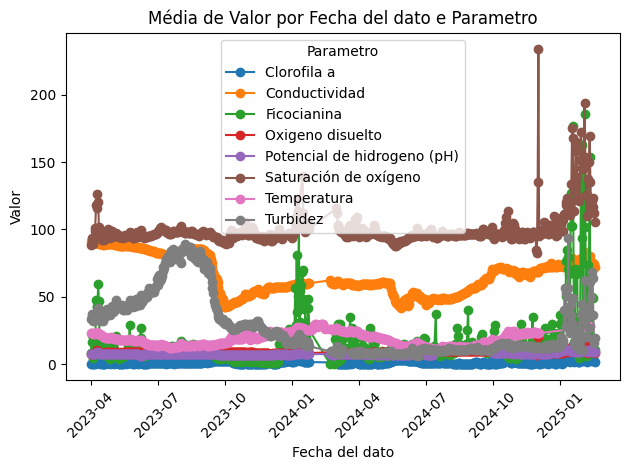

In [46]:
#f, ax = plt.subplots(figsize=(14, 5))
#daily_mean.plot(y="Valor", ax=ax)
for parametro in daily_mean['Parametro'].unique():
    # Filtrar os dados para o parâmetro atual
    dados_parametro = daily_mean[daily_mean['Parametro'] == parametro]
    
    # Plotar os dados do parâmetro atual
    plt.plot(dados_parametro['Fecha del dato'], dados_parametro['Valor'], marker='o', label=parametro)

# Ajustar o título e rótulos
plt.title('Média de Valor por Fecha del dato e Parametro')
plt.xlabel('Fecha del dato')
plt.ylabel('Valor')

# Rotacionar os rótulos do eixo X
plt.xticks(rotation=45)

# Adicionar a legenda
plt.legend(title='Parametro')

# Exibir o gráfico
plt.tight_layout()
plt.show()

## Resumen estadístico de los valores

In [45]:
daily_mean.Valor.describe().to_frame()

,Valor
count,645.000000
mean,1.431244
std,1.298655
min,0.000000
25%,0.649077
50%,0.993542
75%,2.011875
max,9.891522


<Axes: >

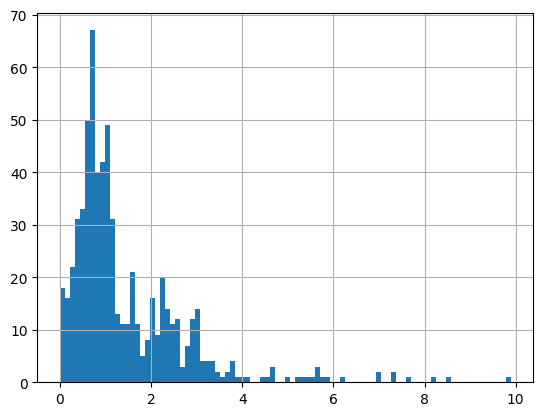

In [46]:
daily_mean.Valor.hist(bins=90)

## Identificando fechas con valores altos de Chl_a para descarga de imagenes de satelites

In [49]:
daily_mean[daily_mean["Valor"] > 4].index

Index([2024-01-07, 2024-01-10, 2024-01-13, 2024-01-14, 2024-06-19, 2024-10-18,
       2024-10-19, 2024-10-20, 2024-10-21, 2024-10-22, 2024-10-29, 2024-10-30,
       2025-01-16, 2025-01-17, 2025-01-18, 2025-01-19, 2025-01-23, 2025-01-24,
       2025-01-29, 2025-01-30, 2025-01-31, 2025-02-03, 2025-02-04, 2025-02-08,
       2025-02-09, 2025-02-10],
      dtype='object', name='Fecha del dato')